# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from numpy.lib.arraysetops import unique
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDRegressor
# import plotly.graph_objs as gg
# ! pip install lightgbm
# from lightgbm import LGBMRegressor
# from sklearn.multioutput import MultiOutputRegressor
# import warnings

# Reading Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\hp\Downloads\Earthquake_dataset.csv")
pd.set_option('display.max_columns', None)

# Visualizing the Affected Areas

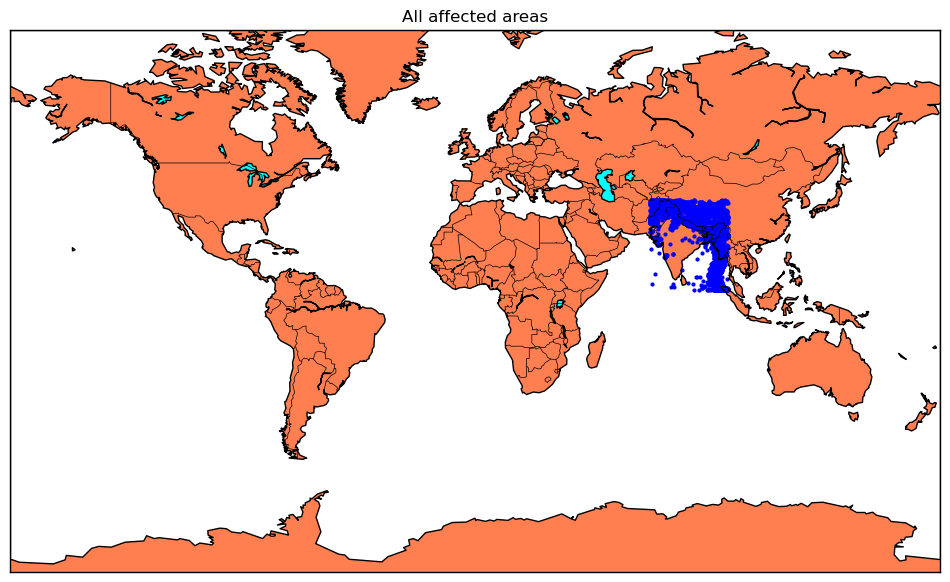

In [3]:
# ! pip install basemap
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = dataset["longitude"].tolist()
latitudes = dataset["latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

# Data Preprocessing

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             14698 non-null  object 
 1   latitude         14698 non-null  float64
 2   longitude        14698 non-null  float64
 3   depth            14698 non-null  float64
 4   mag              14698 non-null  float64
 5   magType          14698 non-null  object 
 6   nst              11841 non-null  float64
 7   gap              12978 non-null  float64
 8   dmin             2694 non-null   float64
 9   rms              14691 non-null  float64
 10  net              14698 non-null  object 
 11  id               14698 non-null  object 
 12  updated          14698 non-null  object 
 13  place            14698 non-null  object 
 14  type             14698 non-null  object 
 15  horizontalError  2073 non-null   float64
 16  depthError       6755 non-null   float64
 17  magError    

In [5]:
dataset.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                 2857
gap                 1720
dmin               12004
rms                    7
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    12625
depthError          7943
magError           12051
magNst              1432
status                 0
locationSource         0
magSource              0
dtype: int64

In [6]:
dataset.nunique()

time               14698
latitude           10713
longitude          10140
depth               3554
mag                   48
magType               10
nst                  427
gap                 2253
dmin                1954
rms                  171
net                    2
id                 14698
updated            13594
place               2419
type                   1
horizontalError      145
depthError           463
magError             269
magNst               193
status                 2
locationSource         5
magSource              8
dtype: int64

In [7]:
data = dataset.drop(
    ['dmin','id','horizontalError','depthError','magError','magNst','type','net','status','locationSource','magSource',
     'updated','place','time','magType']
    , axis=1)

In [8]:
data.head()

,latitude,longitude,depth,mag,nst,gap,rms
0,27.319,91.510,10.0,5.5,205.0,37.4,0.89
1,35.017,73.005,63.8,4.0,40.0,95.8,0.94
2,24.357,94.807,124.8,5.6,206.0,17.3,0.77
3,30.686,83.769,10.0,4.4,50.0,40.6,1.08
4,14.001,92.862,42.6,5.0,117.0,68.1,0.82


In [9]:
data = data.ffill()

In [10]:
data.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
nst          0
gap          0
rms          0
dtype: int64

# Splitting the Dataset

In [11]:
x = data[['latitude','longitude','depth','nst','gap','rms']]
y = data[['mag']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

# Applying Feature Scaling 

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Insights of Feature Sets

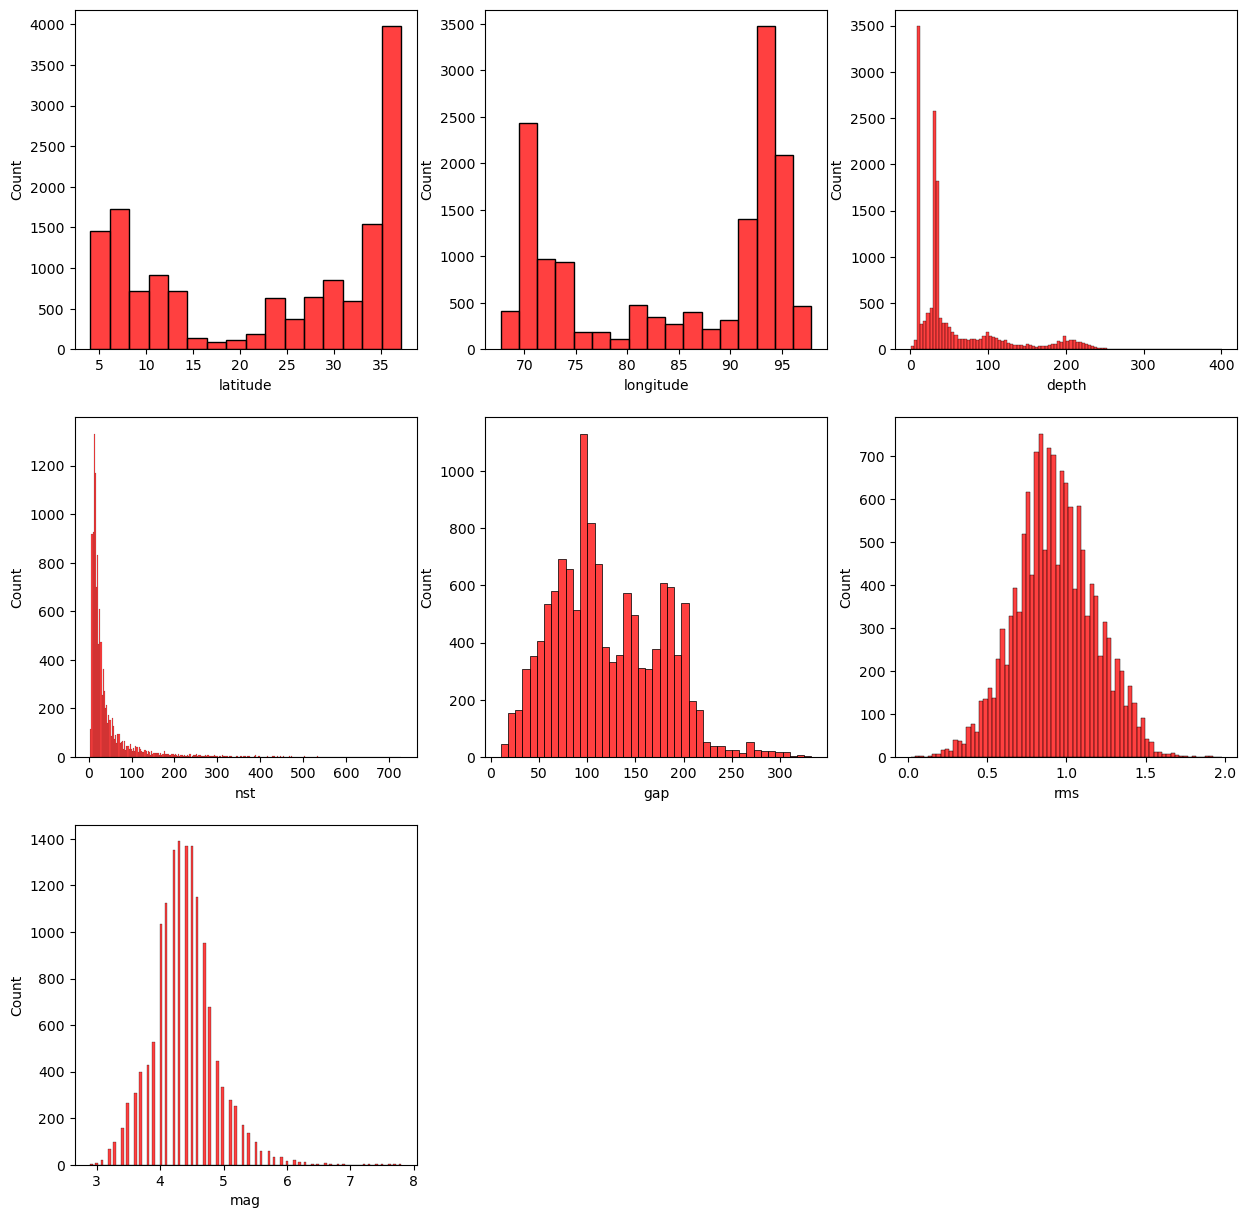

In [13]:
fig = plt.figure(figsize = [15,15])
cols = ['latitude','longitude','depth','nst','gap','rms','mag']
count = 1
for col in cols:
    plt.subplot(3,3,count)
    sns.histplot(dataset[col],color='red')
    count+=1
plt.show()

# Heatmap Analysis

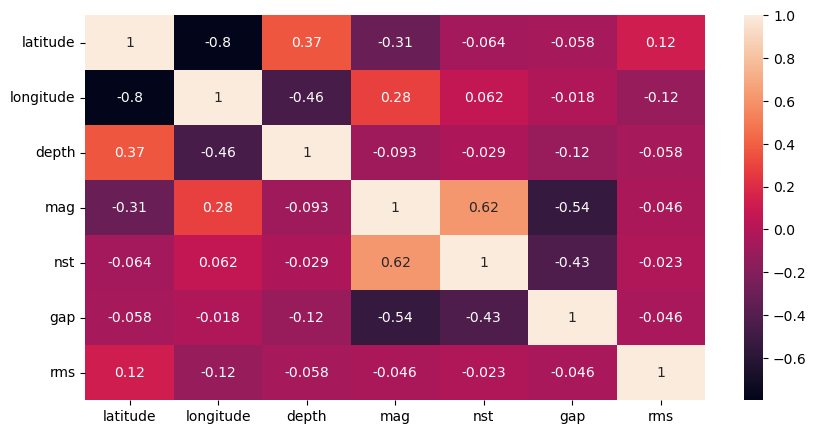

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Plotting the Graph between Feature Set and Target Set

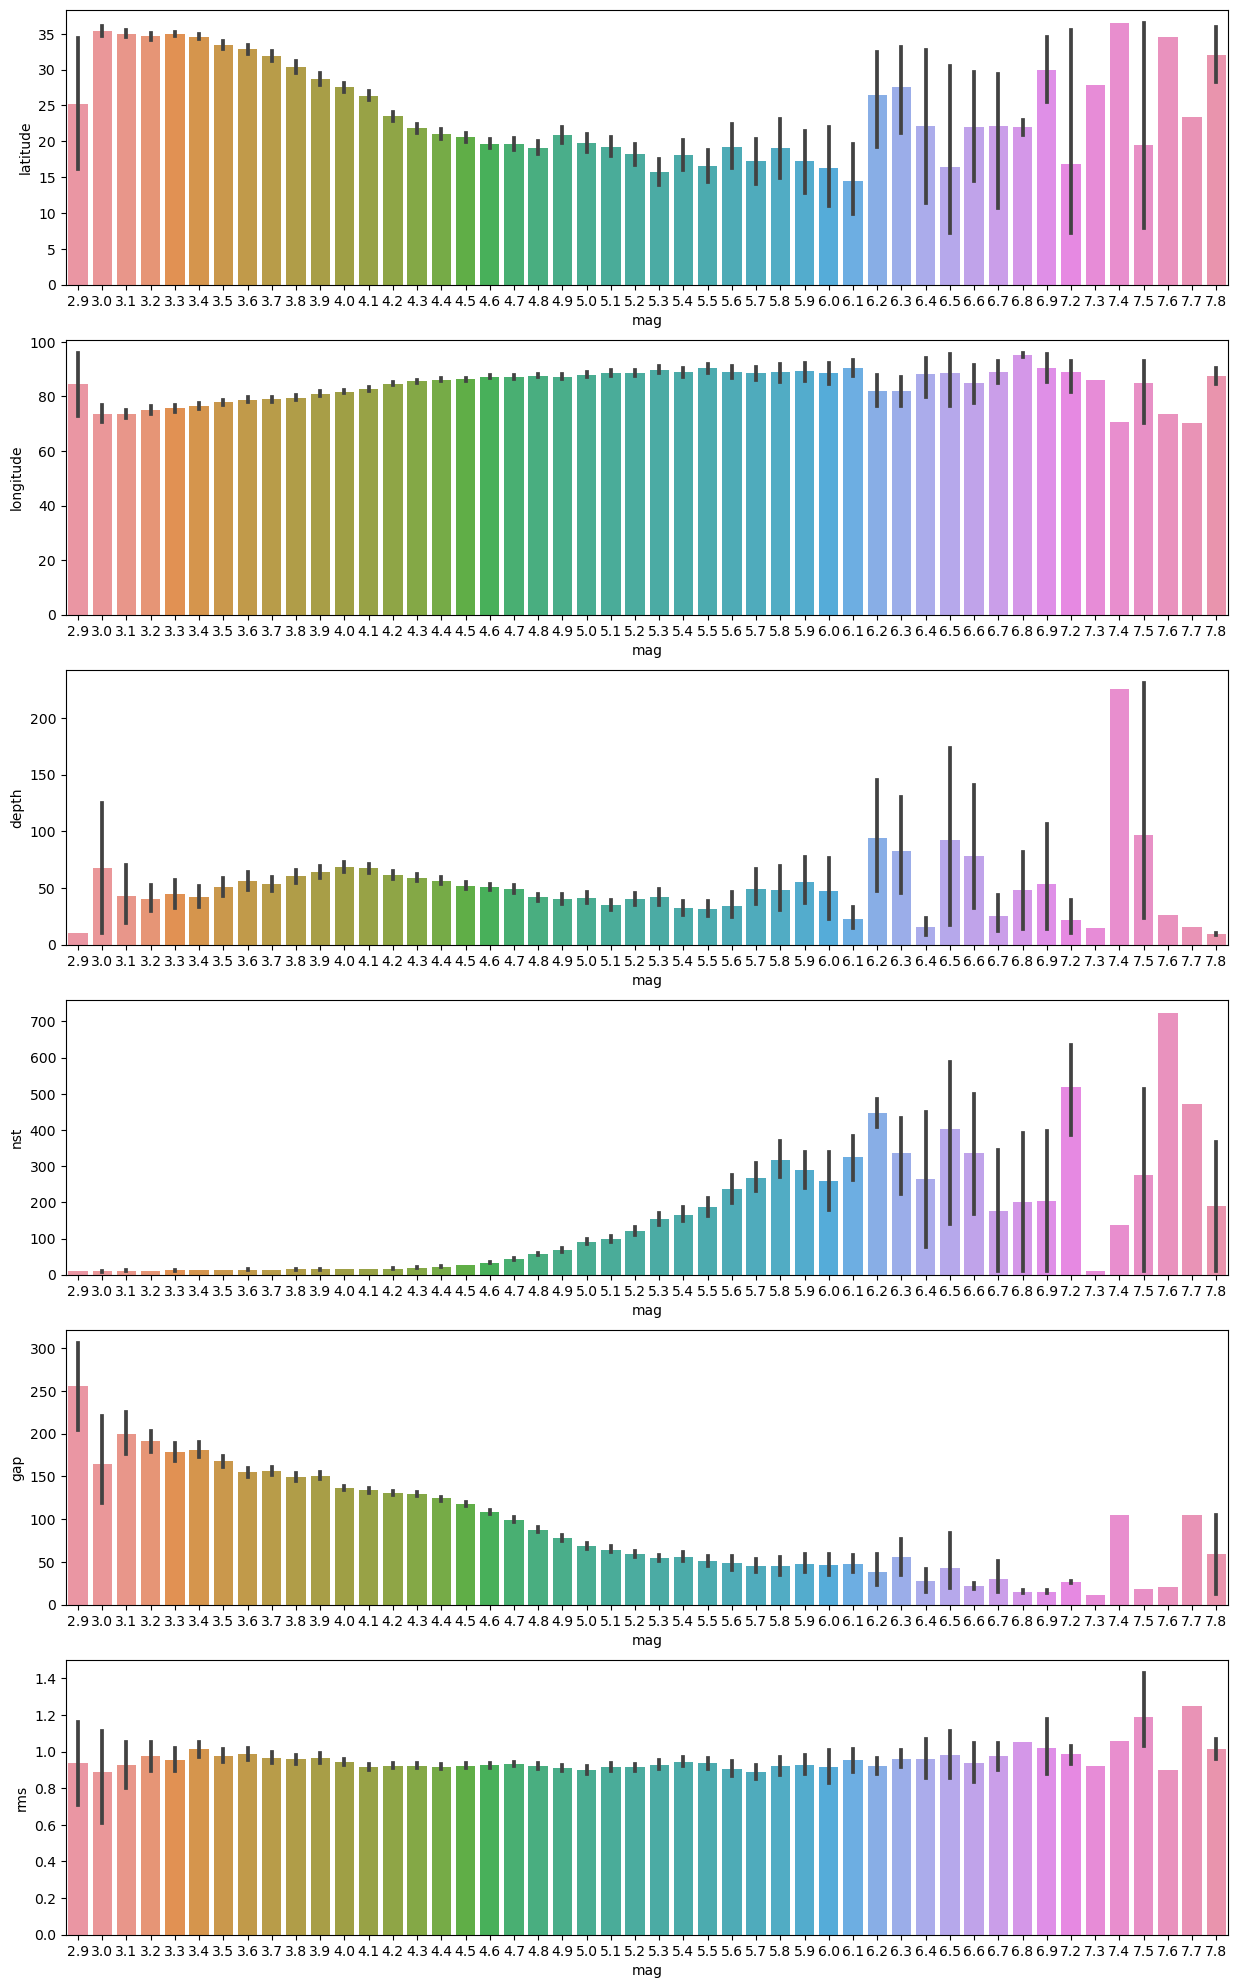

In [15]:
fig = plt.figure(figsize = [15, 25])

cols = ['latitude','longitude','depth','nst','gap','rms']
count = 1

for col in cols :
    plt.subplot(6,1,count)
    sns.barplot(data = data, x = 'mag', y = col)
    count+=1
plt.show()  

# Count for all the frequencies of Earthquake Magnitude

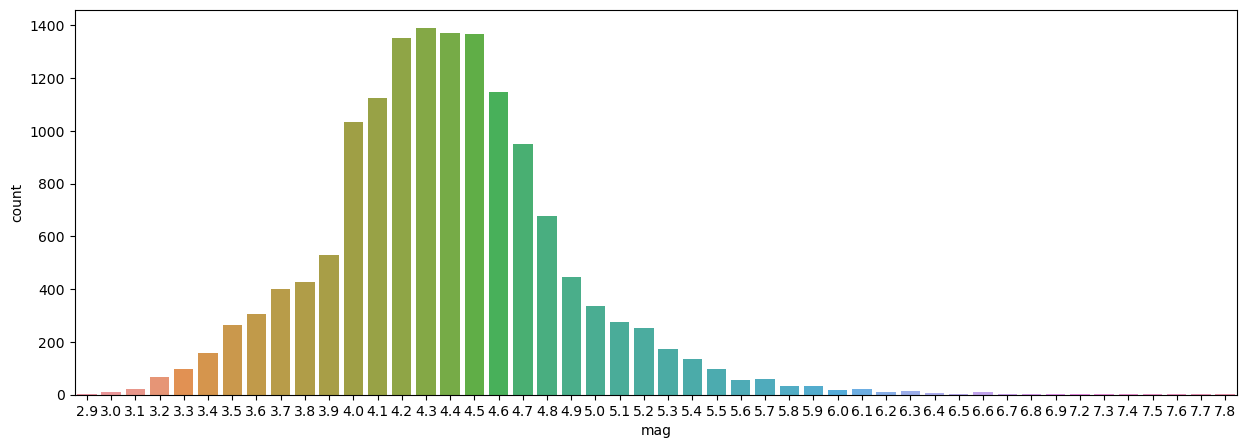

In [16]:
fig = plt.figure(figsize = [15, 5])
sns.countplot(data = data, x = 'mag')
plt.show()

# Linear Regression Model

In [17]:
regressor = LinearRegression()

regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

scores= {"Model name": ["Linear regression", "XGB Regressor", "Random Forest Regressor"], "MSE": [], "MAE": [], "R^2": []}


In [18]:
r2 = r2_score(y_test,y_pred)
print("R-Squared Score --> {}".format(round(r2, 3)))

mae = mean_absolute_error(y_test, y_pred)
print("Mean_Absolute_Error --> {}".format(round(mae, 3)))

mse = mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error --> {}".format(round(mse, 3)))

scores['R^2'].append(r2)
scores['MAE'].append(mae)
scores['MSE'].append(mse)

R-Squared Score --> 0.567
Mean_Absolute_Error --> 0.242
Mean_Squared_Error --> 0.106


# XGB Regression Model

In [19]:
xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(x_train, y_train)

y_pred1 = xgb_reg.predict(x_test)

In [20]:
r2 = r2_score(y_test,y_pred1)
print("R-Squared Score --> {}".format(round(r2, 3)))

mae = mean_absolute_error(y_test, y_pred1)
print("Mean_Absolute_Error --> {}".format(round(mae, 3)))

mse = mean_squared_error(y_test,y_pred1)
print("Mean_Squared_Error --> {}".format(round(mse, 3)))

scores['R^2'].append(r2)
scores['MAE'].append(mae)
scores['MSE'].append(mse)

R-Squared Score --> 0.684
Mean_Absolute_Error --> 0.21
Mean_Squared_Error --> 0.077


# Random Forest Regression Model

In [21]:
rf = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42,
    criterion  = 'squared_error',
    min_samples_split=2,
    min_samples_leaf = 5,
    max_depth = 15)

rf.fit(x_train,y_train)

y_pred2 = rf.predict(x_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_8992\1559722619.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [22]:
r2 = r2_score(y_test,y_pred2)
print("R-Squared Score --> {}".format(round(r2, 3)))

mae = mean_absolute_error(y_test, y_pred2)
print("Mean_Absolute_Error --> {}".format(round(mae, 3)))

mse = mean_squared_error(y_test,y_pred2)
print("Mean_Squared_Error --> {}".format(round(mse, 3)))

scores['R^2'].append(r2)
scores['MAE'].append(mae)
scores['MSE'].append(mse)

R-Squared Score --> 0.699
Mean_Absolute_Error --> 0.204
Mean_Squared_Error --> 0.073


# Comparing the above Models

In [23]:
scores_df = pd.DataFrame(scores)
display(scores_df)   

,Model name,MSE,MAE,R^2
0,Linear regression,0.105687,0.241707,0.566577
1,XGB Regressor,0.077038,0.209986,0.684065
2,Random Forest Regressor,0.073343,0.203831,0.699221


#### From the above result we can conclude that random forest is the most accurate model for predicting the magnitude of Earthquake compared to all other models used in this project.